### **Logistic Regression**

### Identifying the given problem whether it is regression or classification is an first method in the ML Approach.

### **Classification Problems**
### Problems where each input must be assigned a discrete category(label or class) are known as classification problems.

## **Logistic Regression for Solving Classification Problems**

### It is commonly used for binary classification problems. In this model:

### we take linear combination(or weighted sum of the input features)
### we apply sigmoid function to the result to obtain a number b/w 0 and 1.
### This number represents the probablity of the input being classified as "yes"
### Insetad of RMSE, the cross entropy loss function is used to evaluate the results

In [ ]:
import pandas as pd


In [ ]:
train_csv = '/content/weatherAUS.csv'

In [ ]:
raw_df = pd.read_csv(train_csv)

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

### **Exploratory Data Analysis and Visulization**

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(raw_df, x = 'Location', title = 'Location vs. Rainy', color = 'RainToday')

In [ ]:
px.histogram(raw_df, x = 'Temp3pm', title = 'Temp at 3pm vs. Rainy', color = 'RainTomorrow')

In [ ]:
px.histogram(raw_df, x = 'RainTomorrow', title = 'RainTomorrow vs. RainToday', color = 'RainToday')

In [ ]:
px.scatter(raw_df.sample(2500), x = 'MinTemp', y = 'MaxTemp', title = 'MinTemp vs. MaxTemp', color = 'RainToday')

In [ ]:
px.scatter(raw_df.sample(2500), x = 'Temp3pm', y = 'Humidity3pm', title = 'Temp3pm vs. Humidity3pm', color = 'RainTomorrow')

In [ ]:
px.scatter(raw_df.sample(2500), x = 'Sunshine', y = 'Evaporation', title = 'Sunshie vs. Evaporation', color = 'RainToday')

In [ ]:
px.scatter(raw_df.sample(2500), x = 'Sunshine', y = 'Evaporation', title = 'Sunshie vs. Evaporation', color = 'RainTomorrow')

In [ ]:
px.scatter(raw_df.sample(2500), x = 'Cloud9am', y = 'WindSpeed9am', title = 'Cloud9am vs. Windspeed at 9 am', color = 'RainToday')

## **Training, Validation and Test Sets**
### While Buliding real-world ML models, it is quite common to split the data into three parts.
### 1.**Training Set:** Used to train the model,i.e compute the loss and adjust the model's weights using an optimization technique
### 2.**Validation Set:** Used to evaluate the model during training, tune model hyperparameters(optimizing technique, regularizatio etc..), and pick the best version of model.Picking a good validation set is essintial for training the models that generalize models.
### 3.**Test Set:** Used to compare different techniques and report the financial accuray. For many datasets, tests sets are provided seperately.The test set should reflect the kind of data the model will encounter in the real-wolrd, as closely as feasible.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[140787 rows x 23 columns]

<Axes: title={'center': 'No of rows per Year'}, xlabel='Date', ylabel='count'>

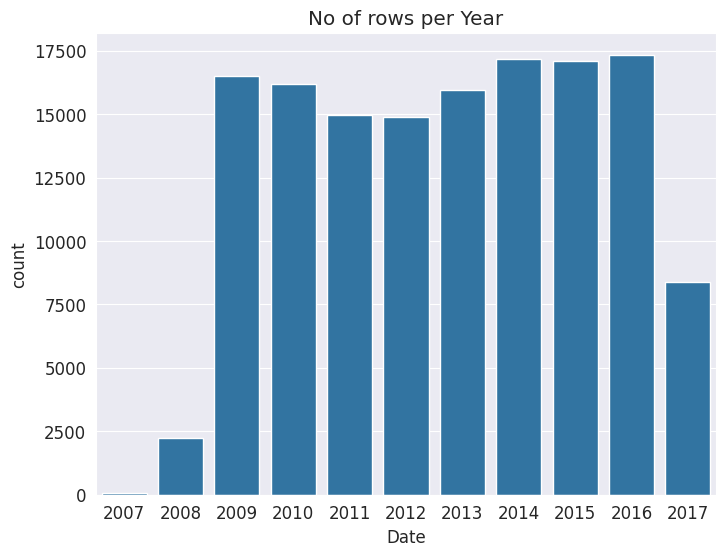

In [ ]:
plt.title('No of rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)


In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [ ]:
print('train_df.shape : ', train_df.shape)
print('val_df.shape : ', val_df.shape)
print('test_df.shape : ', test_df.shape)

train_df.shape :  (97988, 23)
val_df.shape :  (17089, 23)
test_df.shape :  (25710, 23)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97988 entries, 0 to 144552
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           97988 non-null  object 
 1   Location       97988 non-null  object 
 2   MinTemp        97674 non-null  float64
 3   MaxTemp        97801 non-null  float64
 4   Rainfall       97988 non-null  float64
 5   Evaporation    61657 non-null  float64
 6   Sunshine       57942 non-null  float64
 7   WindGustDir    91120 non-null  object 
 8   WindGustSpeed  91160 non-null  float64
 9   WindDir9am     90969 non-null  object 
 10  WindDir3pm     96036 non-null  object 
 11  WindSpeed9am   97114 non-null  float64
 12  WindSpeed3pm   96919 non-null  float64
 13  Humidity9am    96936 non-null  float64
 14  Humidity3pm    96872 non-null  float64
 15  Pressure9am    88876 non-null  float64
 16  Pressure3pm    88857 non-null  float64
 17  Cloud9am       63000 non-null  float64
 18  Cloud3pm  

In [ ]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17089 entries, 2133 to 144917
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           17089 non-null  object 
 1   Location       17089 non-null  object 
 2   MinTemp        17055 non-null  float64
 3   MaxTemp        17060 non-null  float64
 4   Rainfall       17089 non-null  float64
 5   Evaporation    8754 non-null   float64
 6   Sunshine       8051 non-null   float64
 7   WindGustDir    16196 non-null  object 
 8   WindGustSpeed  16214 non-null  float64
 9   WindDir9am     15990 non-null  object 
 10  WindDir3pm     16578 non-null  object 
 11  WindSpeed9am   17018 non-null  float64
 12  WindSpeed3pm   16727 non-null  float64
 13  Humidity9am    16877 non-null  float64
 14  Humidity3pm    16428 non-null  float64
 15  Pressure9am    15112 non-null  float64
 16  Pressure3pm    15112 non-null  float64
 17  Cloud9am       10583 non-null  float64
 18  Cloud3p

In [ ]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25710 entries, 2498 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           25710 non-null  object 
 1   Location       25710 non-null  object 
 2   MinTemp        25590 non-null  float64
 3   MaxTemp        25619 non-null  float64
 4   Rainfall       25710 non-null  float64
 5   Evaporation    10682 non-null  float64
 6   Sunshine       7989 non-null   float64
 7   WindGustDir    24308 non-null  object 
 8   WindGustSpeed  24308 non-null  float64
 9   WindDir9am     24168 non-null  object 
 10  WindDir3pm     24503 non-null  object 
 11  WindSpeed9am   25600 non-null  float64
 12  WindSpeed3pm   24610 non-null  float64
 13  Humidity9am    25457 non-null  float64
 14  Humidity3pm    23986 non-null  float64
 15  Pressure9am    23056 non-null  float64
 16  Pressure3pm    23049 non-null  float64
 17  Cloud9am       14579 non-null  float64
 18  Cloud3p

### **Identifying Input and Target Columns**

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [ ]:
target_col

'RainTomorrow'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [ ]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [ ]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [ ]:
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [ ]:
val_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury     11.4     33.5       0.0          NaN       NaN   
2134     Albury     15.5     39.6       0.0          NaN       NaN   
2135     Albury     17.1     38.3       0.0          NaN       NaN   
2136     Albury     26.0     33.1       0.0          NaN       NaN   
2137     Albury     19.0     35.2       0.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144913    Uluru     20.5     34.7       0.0          NaN       NaN   
144914    Uluru     18.0     36.4       0.0          NaN       NaN   
144915    Uluru     17.5     37.1       0.0          NaN       NaN   
144916    Uluru     20.0     38.9       0.0          NaN       NaN   
144917    Uluru     19.3     37.4       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
2133           WSW           30.0        ESE          W  ...          11.0   
2134            NE           56.0        ESE        ESE  ...           9.0   
2135           NNE           48.0         NE          N  ...          20.0   
2136           NNE           41.0        ESE          W  ...           7.0   
2137             E           33.0        SSE         SE  ...           9.0   
...            ...            ...        ...        ...  ...           ...   
144913           E           52.0        ESE          E  ...          20.0   
144914         ESE           54.0          E        ESE  ...          31.0   
144915           E           56.0          E         SE  ...          22.0   
144916           E           59.0          E        SSE  ...          17.0   
144917          SE           56.0        ESE          S  ...          28.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
2133           45.0         14.0       1013.5       1011.0       NaN   
2134           45.0         12.0       1016.0       1012.4       NaN   
2135           35.0         19.0       1017.9       1012.3       NaN   
2136           46.0         37.0       1013.6       1012.1       8.0   
2137           60.0         34.0       1017.4       1014.7       8.0   
...             ...          ...          ...          ...       ...   
144913         23.0         12.0       1013.2       1010.1       NaN   
144914         17.0          7.0       1014.7       1010.9       NaN   
144915         12.0          7.0       1012.6       1007.5       NaN   
144916         12.0         12.0       1007.2       1002.6       NaN   
144917         46.0         18.0       1007.3       1003.7       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
2133         NaN     21.0     32.7         No  
2134         NaN     25.6     38.2         No  
2135         NaN     29.2     37.0         No  
2136         5.0     27.4     30.9         No  
2137         NaN     25.6     32.5         No  
...          ...      ...      ...        ...  
144913       NaN     24.3     33.0         No  
144914       NaN     26.7     35.0         No  
144915       NaN     28.1     34.7         No  
144916       1.0     31.3     38.4         No  
144917       NaN     25.8     35.8         No  

[17089 rows x 21 columns]

In [ ]:
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [ ]:
test_target

2498       No
2499      Yes
2500      Yes
2501      Yes
2502       No
         ... 
145454     No
145455     No
145456     No
145457     No
145458     No
Name: RainTomorrow, Length: 25710, dtype: object

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()
categorial_cols = train_inputs.select_dtypes('object').columns.to_list()

In [ ]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
categorial_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [ ]:
train_inputs[categorial_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

### **Imputing Missing Numeric Data**
### ML models can't work with missing numeric data. The process of filling missing values is called imputation.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy= 'mean')

In [ ]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

The first ste in the imputation is to `fit` the imputer to the data i.e compute the chosen statistic(eg->.mean) for each column in the dataset

In [ ]:
raw_df[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          NaN       NaN           44.0   
1           7.4     25.1       0.0          NaN       NaN           44.0   
2          12.9     25.7       0.0          NaN       NaN           46.0   
3           9.2     28.0       0.0          NaN       NaN           24.0   
4          17.5     32.3       1.0          NaN       NaN           41.0   
...         ...      ...       ...          ...       ...            ...   
145454      3.5     21.8       0.0          NaN       NaN           31.0   
145455      2.8     23.4       0.0          NaN       NaN           31.0   
145456      3.6     25.3       0.0          NaN       NaN           22.0   
145457      5.4     26.9       0.0          NaN       NaN           37.0   
145458      7.8     27.0       0.0          NaN       NaN           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1       8.0       NaN     16.9     21.8  
1            1007.8       NaN       NaN     17.2     24.3  
2            1008.7       NaN       2.0     21.0     23.2  
3            1012.8       NaN       NaN     18.1     26.5  
4            1006.0       7.0       8.0     17.8     29.7  
...             ...       ...       ...      ...      ...  
145454       1021.2       NaN       NaN      9.4     20.9  
145455       1020.3       NaN       NaN     10.1     22.4  
145456       1019.1       NaN       NaN     10.9     24.5  
145457       1016.8       NaN       NaN     12.5     26.1  
145458       1016.5       3.0       2.0     15.1     26.0  

[140787 rows x 16 columns]

In [ ]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [ ]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
list(imputer.statistics_)

[np.float64(12.18482386562048),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047281),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543717),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.98706638787991),
 np.float64(21.69318269001107)]

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### **Scaling Numeric Features**
Another good practice is to scale numeric features to a small range of values e.g.(0,1) or (-1,1). Scaling numeric features ensures that no particular feature has a dispropertinace impact on model's loss. Optimization algorithms also work better in practice with smaller numbers.

In [ ]:
raw_df[numeric_cols].describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [ ]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[np.float64(-8.5),
 np.float64(-4.8),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(6.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(980.5),
 np.float64(977.1),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-7.2),
 np.float64(-5.4)]

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[np.float64(33.9),
 np.float64(48.1),
 np.float64(371.0),
 np.float64(145.0),
 np.float64(14.5),
 np.float64(135.0),
 np.float64(130.0),
 np.float64(87.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(1041.0),
 np.float64(1039.6),
 np.float64(9.0),
 np.float64(9.0),
 np.float64(40.2),
 np.float64(46.7)]

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

## **Encoding Categorial Data**
Since ML models can only be trained with numeric data,we need to convert categorial data to numbers.A common technique is to use one-hot encoding for categorial columns.

One-Hot encoding involves adding a new binary(0/1) column for each unique category of categorial column.

In [ ]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
raw_df[categorial_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
raw_df1 = raw_df[categorial_cols].fillna('N/A')

In [ ]:
encoder.fit(raw_df1)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
# This cell previously overwrote raw_df, leading to data loss in subsequent steps.
# It is now removed as its functionality is integrated into the encoder fitting step.

In [ ]:
categorial_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'N/A', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
        'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'N/A', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE',
        'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorial_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [ ]:
# Encode and merge back into the main datasets
encoded_train = pd.DataFrame(
    encoder.transform(train_inputs[categorial_cols].fillna('N/A')),
    columns=encoded_cols,
    index=train_inputs.index
)

encoded_val = pd.DataFrame(
    encoder.transform(val_inputs[categorial_cols].fillna('N/A')),
    columns=encoded_cols,
    index=val_inputs.index
)

encoded_test = pd.DataFrame(
    encoder.transform(test_inputs[categorial_cols].fillna('N/A')),
    columns=encoded_cols,
    index=test_inputs.index
)

# Drop the original categorical columns and add encoded ones
train_inputs = pd.concat([train_inputs.drop(columns=categorial_cols), encoded_train], axis=1)
val_inputs = pd.concat([val_inputs.drop(columns=categorial_cols), encoded_val], axis=1)
test_inputs = pd.concat([test_inputs.drop(columns=categorial_cols), encoded_test], axis=1)

# Optional but helps avoid memory fragmentation warnings
train_inputs = train_inputs.copy()
val_inputs = val_inputs.copy()
test_inputs = test_inputs.copy()

print("Final train_inputs shape:", train_inputs.shape)
train_inputs.head()


Final train_inputs shape: (97988, 118)


MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.516509  0.523629  0.001617     0.037741  0.526244       0.294574   
1  0.375000  0.565217  0.000000     0.037741  0.526244       0.294574   
2  0.504717  0.576560  0.000000     0.037741  0.526244       0.310078   
3  0.417453  0.620038  0.000000     0.037741  0.526244       0.139535   
4  0.613208  0.701323  0.002695     0.037741  0.526244       0.271318   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_S  \
0      0.153846      0.275862         0.71         0.22  ...           0.0   
1      0.030769      0.252874         0.44         0.25  ...           0.0   
2      0.146154      0.298851         0.38         0.30  ...           0.0   
3      0.084615      0.103448         0.45         0.16  ...           0.0   
4      0.053846      0.229885         0.82         0.33  ...           0.0   

   WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0            0.0             0.0             0.0            0.0           0.0   
1            0.0             0.0             0.0            0.0           0.0   
2            0.0             0.0             0.0            0.0           0.0   
3            0.0             0.0             0.0            0.0           0.0   
4            0.0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  RainToday_Yes  
0             1.0             0.0           1.0            0.0  
1             0.0             1.0           1.0            0.0  
2             0.0             1.0           1.0            0.0  
3             0.0             0.0           1.0            0.0  
4             0.0             0.0           1.0            0.0  

[5 rows x 118 columns]

In [ ]:
# Encode categorical columns safely in one go

# Pick only columns that actually exist
available_cols = [col for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
                  if col in train_inputs.columns]

# Encode only those columns
if available_cols:
    encoded_train = pd.DataFrame(
        encoder.transform(train_inputs[available_cols].fillna('N/A')),
        columns=encoder.get_feature_names_out(available_cols),
        index=train_inputs.index
    )

    encoded_val = pd.DataFrame(
        encoder.transform(val_inputs[available_cols].fillna('N/A')),
        columns=encoder.get_feature_names_out(available_cols),
        index=val_inputs.index
    )

    encoded_test = pd.DataFrame(
        encoder.transform(test_inputs[available_cols].fillna('N/A')),
        columns=encoder.get_feature_names_out(available_cols),
        index=test_inputs.index
    )

    # Drop the old categorical ones and attach the new encoded ones
    train_inputs = pd.concat([train_inputs.drop(columns=available_cols, errors='ignore'), encoded_train], axis=1)
    val_inputs = pd.concat([val_inputs.drop(columns=available_cols, errors='ignore'), encoded_val], axis=1)
    test_inputs = pd.concat([test_inputs.drop(columns=available_cols, errors='ignore'), encoded_test], axis=1)

# Compact memory
train_inputs = train_inputs.copy()
val_inputs = val_inputs.copy()
test_inputs = test_inputs.copy()

print("✅ Encoding complete")
print("Train shape:", train_inputs.shape)
train_inputs.head()


✅ Encoding complete
Train shape: (97988, 118)


MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.516509  0.523629  0.001617     0.037741  0.526244       0.294574   
1  0.375000  0.565217  0.000000     0.037741  0.526244       0.294574   
2  0.504717  0.576560  0.000000     0.037741  0.526244       0.310078   
3  0.417453  0.620038  0.000000     0.037741  0.526244       0.139535   
4  0.613208  0.701323  0.002695     0.037741  0.526244       0.271318   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_S  \
0      0.153846      0.275862         0.71         0.22  ...           0.0   
1      0.030769      0.252874         0.44         0.25  ...           0.0   
2      0.146154      0.298851         0.38         0.30  ...           0.0   
3      0.084615      0.103448         0.45         0.16  ...           0.0   
4      0.053846      0.229885         0.82         0.33  ...           0.0   

   WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0            0.0             0.0             0.0            0.0           0.0   
1            0.0             0.0             0.0            0.0           0.0   
2            0.0             0.0             0.0            0.0           0.0   
3            0.0             0.0             0.0            0.0           0.0   
4            0.0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  RainToday_Yes  
0             1.0             0.0           1.0            0.0  
1             0.0             1.0           1.0            0.0  
2             0.0             1.0           1.0            0.0  
3             0.0             0.0           1.0            0.0  
4             0.0             0.0           1.0            0.0  

[5 rows x 118 columns]

In [ ]:
print(train_inputs.columns.tolist())


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [ ]:
# Remove duplicate columns safely
train_inputs = train_inputs.loc[:, ~train_inputs.columns.duplicated()].copy()
val_inputs = val_inputs.loc[:, ~val_inputs.columns.duplicated()].copy()
test_inputs = test_inputs.loc[:, ~test_inputs.columns.duplicated()].copy()

print("✅ Cleaned. Final shape:", train_inputs.shape)


✅ Cleaned. Final shape: (97988, 118)


In [ ]:
test_inputs

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498    0.681604  0.801512  0.000000     0.037741  0.526244       0.372093   
2499    0.693396  0.725898  0.001078     0.037741  0.526244       0.341085   
2500    0.634434  0.527410  0.005930     0.037741  0.526244       0.325581   
2501    0.608491  0.538752  0.042049     0.037741  0.526244       0.255814   
2502    0.566038  0.523629  0.018329     0.037741  0.526244       0.193798   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.037741  0.526244       0.193798   
145455  0.266509  0.533081  0.000000     0.037741  0.526244       0.193798   
145456  0.285377  0.568998  0.000000     0.037741  0.526244       0.124031   
145457  0.327830  0.599244  0.000000     0.037741  0.526244       0.240310   
145458  0.384434  0.601134  0.000000     0.037741  0.526244       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
2498        0.000000      0.080460         0.46         0.17  ...   
2499        0.069231      0.195402         0.54         0.30  ...   
2500        0.084615      0.448276         0.62         0.67  ...   
2501        0.069231      0.195402         0.74         0.65  ...   
2502        0.046154      0.103448         0.92         0.63  ...   
...              ...           ...          ...          ...  ...   
145454      0.115385      0.149425         0.59         0.27  ...   
145455      0.100000      0.126437         0.51         0.24  ...   
145456      0.100000      0.103448         0.56         0.21  ...   
145457      0.069231      0.103448         0.53         0.24  ...   
145458      0.100000      0.080460         0.51         0.24  ...   

        WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
2498             0.0            0.0             0.0             0.0   
2499             0.0            1.0             0.0             0.0   
2500             0.0            0.0             0.0             0.0   
2501             0.0            0.0             1.0             0.0   
2502             0.0            0.0             1.0             0.0   
...              ...            ...             ...             ...   
145454           0.0            0.0             0.0             0.0   
145455           0.0            0.0             0.0             0.0   
145456           0.0            0.0             0.0             0.0   
145457           0.0            0.0             0.0             0.0   
145458           0.0            0.0             0.0             0.0   

        WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  \
2498              0.0           0.0             0.0             0.0   
2499              0.0           0.0             0.0             0.0   
2500              0.0           0.0             0.0             0.0   
2501              0.0           0.0             0.0             0.0   
2502              0.0           0.0             0.0             0.0   
...               ...           ...             ...             ...   
145454            0.0           0.0             0.0             0.0   
145455            0.0           0.0             0.0             0.0   
145456            0.0           0.0             0.0             0.0   
145457            0.0           0.0             1.0             0.0   
145458            0.0           0.0             0.0             0.0   

        RainToday_No  RainToday_Yes  
2498             1.0            0.0  
2499             1.0            0.0  
2500             0.0            1.0  
2501             0.0            1.0  
2502             0.0            1.0  
...              ...            ...  
145454           1.0            0.0  
145455           1.0            0.0  
145456           1.0            0.0  
145457           1.0            0.0  
145458           1.0            0.0  

[25710 rows x 118 columns]

In [ ]:
print(test_inputs.columns.tolist())


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [ ]:
# Make sure these are your categorical columns
categorial_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Check which ones exist in each dataset (safety check)
available_cols = [col for col in categorial_cols if col in train_inputs.columns or col in test_inputs.columns or col in val_inputs.columns]

# Encode for test_inputs if not already encoded
if available_cols and not any(col.startswith('Location_') for col in test_inputs.columns):
    encoded_test = pd.DataFrame(
        encoder.transform(test_inputs[available_cols].fillna('N/A')),
        columns=encoder.get_feature_names_out(available_cols),
        index=test_inputs.index
    )

    # Drop the old text columns and join encoded ones
    test_inputs = pd.concat([test_inputs.drop(columns=available_cols, errors='ignore'), encoded_test], axis=1)
    test_inputs = test_inputs.loc[:, ~test_inputs.columns.duplicated()].copy()

print("✅ Test set encoded")
print("Columns:", len(test_inputs.columns))


✅ Test set encoded
Columns: 118


In [ ]:
test_inputs.head()


MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498  0.681604  0.801512  0.000000     0.037741  0.526244       0.372093   
2499  0.693396  0.725898  0.001078     0.037741  0.526244       0.341085   
2500  0.634434  0.527410  0.005930     0.037741  0.526244       0.325581   
2501  0.608491  0.538752  0.042049     0.037741  0.526244       0.255814   
2502  0.566038  0.523629  0.018329     0.037741  0.526244       0.193798   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_S  \
2498      0.000000      0.080460         0.46         0.17  ...           0.0   
2499      0.069231      0.195402         0.54         0.30  ...           0.0   
2500      0.084615      0.448276         0.62         0.67  ...           0.0   
2501      0.069231      0.195402         0.74         0.65  ...           0.0   
2502      0.046154      0.103448         0.92         0.63  ...           0.0   

      WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
2498            0.0             0.0             0.0            0.0   
2499            1.0             0.0             0.0            0.0   
2500            0.0             0.0             0.0            0.0   
2501            0.0             1.0             0.0            0.0   
2502            0.0             1.0             0.0            0.0   

      WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  \
2498           0.0             0.0             0.0           1.0   
2499           0.0             0.0             0.0           1.0   
2500           0.0             0.0             0.0           0.0   
2501           0.0             0.0             0.0           0.0   
2502           0.0             0.0             0.0           0.0   

      RainToday_Yes  
2498            0.0  
2499            0.0  
2500            1.0  
2501            1.0  
2502            1.0  

[5 rows x 118 columns]

In [ ]:
# Ensure all three datasets have the same columns and order
missing_in_test = set(train_inputs.columns) - set(test_inputs.columns)
missing_in_val = set(train_inputs.columns) - set(val_inputs.columns)

print("Missing in test:", missing_in_test)
print("Missing in val:", missing_in_val)

# Add any missing columns as zeros (this keeps model input consistent)
for col in missing_in_test:
    test_inputs[col] = 0
for col in missing_in_val:
    val_inputs[col] = 0

# Align column order with train_inputs
test_inputs = test_inputs[train_inputs.columns]
val_inputs = val_inputs[train_inputs.columns]

print("✅ All datasets aligned")
print("Train:", train_inputs.shape, "Val:", val_inputs.shape, "Test:", test_inputs.shape)


Missing in test: set()
Missing in val: set()
✅ All datasets aligned
Train: (97988, 118) Val: (17089, 118) Test: (25710, 118)


### **Saving Processed Data to Disk**

In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_target: ', train_target.shape)
print('val_inputs: ', val_inputs.shape)
print('val_target: ', val_target.shape)
print('test_inputs: ', test_inputs.shape)
print('test_target: ', test_target.shape)

train_inputs: (97988, 118)
train_target:  (97988,)
val_inputs:  (17089, 118)
val_target:  (17089,)
test_inputs:  (25710, 118)
test_target:  (25710,)


In [ ]:
pip install pyarrow --quiet

In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [ ]:
pd.DataFrame(train_target).to_parquet('train_targets.parquet')
pd.DataFrame(val_target).to_parquet('val_targets.parquet')
pd.DataFrame(test_target).to_parquet('test_targets.parquet')

In [ ]:
%time
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_target = pd.read_parquet('train_targets.parquet')
val_target = pd.read_parquet('val_targets.parquet')
test_target = pd.read_parquet('test_targets.parquet')

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs


In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_target: ', train_target.shape)
print('val_inputs: ', val_inputs.shape)
print('val_target: ', val_target.shape)
print('test_inputs: ', test_inputs.shape)
print('test_target: ', test_target.shape)

train_inputs: (97988, 118)
train_target:  (97988, 1)
val_inputs:  (17089, 118)
val_target:  (17089, 1)
test_inputs:  (25710, 118)
test_target:  (25710, 1)


In [ ]:
train_inputs

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037741  0.526244       0.294574   
1       0.375000  0.565217  0.000000     0.037741  0.526244       0.294574   
2       0.504717  0.576560  0.000000     0.037741  0.526244       0.310078   
3       0.417453  0.620038  0.000000     0.037741  0.526244       0.139535   
4       0.613208  0.701323  0.002695     0.037741  0.526244       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.037741  0.526244       0.286822   
144549  0.556604  0.786389  0.000000     0.037741  0.526244       0.193798   
144550  0.608491  0.805293  0.000000     0.037741  0.526244       0.255814   
144551  0.674528  0.818526  0.000000     0.037741  0.526244       0.286822   
144552  0.731132  0.839319  0.000000     0.037741  0.526244       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.153846      0.275862         0.71         0.22  ...   
1           0.030769      0.252874         0.44         0.25  ...   
2           0.146154      0.298851         0.38         0.30  ...   
3           0.084615      0.103448         0.45         0.16  ...   
4           0.053846      0.229885         0.82         0.33  ...   
...              ...           ...          ...          ...  ...   
144548      0.184615      0.298851         0.22         0.13  ...   
144549      0.146154      0.229885         0.16         0.08  ...   
144550      0.200000      0.103448         0.15         0.08  ...   
144551      0.215385      0.195402         0.22         0.09  ...   
144552      0.230769      0.149425         0.16         0.09  ...   

        WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0                0.0            0.0             0.0             0.0   
1                0.0            0.0             0.0             0.0   
2                0.0            0.0             0.0             0.0   
3                0.0            0.0             0.0             0.0   
4                0.0            0.0             0.0             0.0   
...              ...            ...             ...             ...   
144548           0.0            0.0             1.0             0.0   
144549           0.0            0.0             0.0             0.0   
144550           0.0            0.0             1.0             0.0   
144551           0.0            0.0             0.0             1.0   
144552           0.0            0.0             0.0             1.0   

        WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  \
0                 0.0           0.0             1.0             0.0   
1                 0.0           0.0             0.0             1.0   
2                 0.0           0.0             0.0             1.0   
3                 0.0           0.0             0.0             0.0   
4                 0.0           0.0             0.0             0.0   
...               ...           ...             ...             ...   
144548            0.0           0.0             0.0             0.0   
144549            1.0           0.0             0.0             0.0   
144550            0.0           0.0             0.0             0.0   
144551            0.0           0.0             0.0             0.0   
144552            0.0           0.0             0.0             0.0   

        RainToday_No  RainToday_Yes  
0                1.0            0.0  
1                1.0            0.0  
2                1.0            0.0  
3                1.0            0.0  
4                1.0            0.0  
...              ...            ...  
144548           1.0            0.0  
144549           1.0            0.0  
144550           1.0            0.0  
144551           1.0            0.0  
144552           1.0            0.0  

[97988 rows x 118 columns]

In [ ]:
train_inputs[encoded_cols]

Location_Adelaide  Location_Albany  Location_Albury  \
0                     0.0              0.0              1.0   
1                     0.0              0.0              1.0   
2                     0.0              0.0              1.0   
3                     0.0              0.0              1.0   
4                     0.0              0.0              1.0   
...                   ...              ...              ...   
144548                0.0              0.0              0.0   
144549                0.0              0.0              0.0   
144550                0.0              0.0              0.0   
144551                0.0              0.0              0.0   
144552                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                0.0   
4                         0.0                     0.0                0.0   
...                       ...                     ...                ...   
144548                    0.0                     0.0                0.0   
144549                    0.0                     0.0                0.0   
144550                    0.0                     0.0                0.0   
144551                    0.0                     0.0                0.0   
144552                    0.0                     0.0                0.0   

        Location_Bendigo  Location_Brisbane  Location_Cairns  \
0                    0.0                0.0              0.0   
1                    0.0                0.0              0.0   
2                    0.0                0.0              0.0   
3                    0.0                0.0              0.0   
4                    0.0                0.0              0.0   
...                  ...                ...              ...   
144548               0.0                0.0              0.0   
144549               0.0                0.0              0.0   
144550               0.0                0.0              0.0   
144551               0.0                0.0              0.0   
144552               0.0                0.0              0.0   

        Location_Canberra  ...  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0                     0.0  ...           0.0            0.0             0.0   
1                     0.0  ...           0.0            0.0             0.0   
2                     0.0  ...           0.0            0.0             0.0   
3                     0.0  ...           0.0            0.0             0.0   
4                     0.0  ...           0.0            0.0             0.0   
...                   ...  ...           ...            ...             ...   
144548                0.0  ...           0.0            0.0             1.0   
144549                0.0  ...           0.0            0.0             0.0   
144550                0.0  ...           0.0            0.0             1.0   
144551                0.0  ...           0.0            0.0             0.0   
144552                0.0  ...           0.0            0.0             0.0   

        WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
0                  0.0            0.0           0.0             1.0   
1                  0.0            0.0           0.0             0.0   
2                  0.0            0.0           0.0             0.0   
3                  0.0            0.0           0.0             0.0   
4                  0.0            0.0           0.0             0.0   
...                ...            ...           ...             ...   
144548             0.0            0.0           0.0             0.0   
144549             0.0            1.0           0.0 

### **Training the model**

The `train_inputs` DataFrame has already been transformed. It now contains the scaled numeric features and the one-hot encoded categorical features. Here's a look at the first 5 rows and its shape:

### **Training the Logistic Regression Model**


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver = 'liblinear')

In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_target)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(solver='liblinear')

In [ ]:
train_target

RainTomorrow
0                No
1                No
2                No
3                No
4                No
...             ...
144548           No
144549           No
144550           No
144551           No
144552           No

[97988 rows x 1 columns]

In [ ]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [ ]:
print(model.coef_.tolist())

[[0.898630971357422, -2.8799141342624046, 3.162777932408774, 0.8542478419455545, -1.6713938007075373, 6.764402612907081, -0.9423226110395558, -1.4284292887401657, 0.3228916018262349, 5.995314612171444, 5.463857782591317, -9.17680539860203, -0.16229615258104352, 1.2876600674904366, 0.4747154308476373, 2.0214288084536403, 0.6016499096452927, -0.5524827941702076, 0.47814253740705237, 0.007670158709840221, 0.3468143891144873, -0.35227686280176884, 0.1797104792335645, 0.44048620135413613, -0.013981965753351006, 0.02894391902516814, 0.2581475006253555, -0.021205211803121016, -0.042795401989062926, -0.4831418764779682, -0.1375630870936956, -0.5760590509181917, -0.7875244557491471, -0.2554044484809082, -0.32888339128763733, -0.5690038641413184, 0.0818300555951568, 0.013382349720810335, 0.06412764640749952, -0.9020544233015055, -0.4443302778411449, 0.008516563204881283, -0.46061240529009384, -0.4655178922978169, -0.0694985632915591, 0.19115890422284998, 0.4504755896106382, 0.6081211255672346, 0

In [ ]:
print(model.intercept_)

[-2.44955416]


In [ ]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
print(len(numeric_cols + encoded_cols))
print(len(model.coef_.tolist()[0]))


118
118


In [ ]:
n = len(model.coef_.tolist())
weight_df = pd.DataFrame({
    'feature': (numeric_cols + encoded_cols),
    'weight' : model.coef_.tolist()[0]
})

In [ ]:
print(model.intercept_)

[-2.44955416]


<Axes: xlabel='weight', ylabel='feature'>

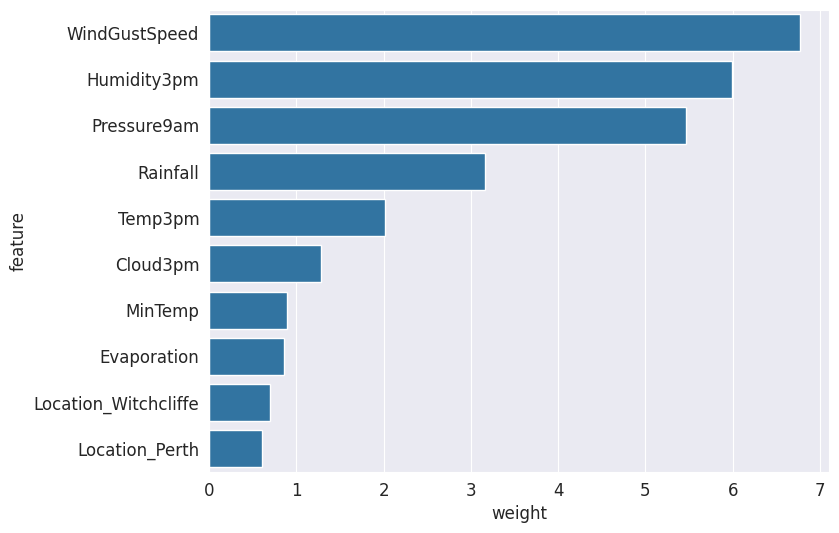

In [ ]:
sns.barplot(data=weight_df.sort_values('weight',ascending=False).head(10), x ='weight', y = 'feature')

### **Making Predctions and Evaulating the Model**

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
val_preds = model.predict(X_val)
val_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
train_prob = model.predict_proba(X_train)
train_prob

array([[0.94401105, 0.05598895],
       [0.94074113, 0.05925887],
       [0.96093595, 0.03906405],
       ...,
       [0.98749101, 0.01250899],
       [0.98334663, 0.01665337],
       [0.87453304, 0.12546696]])

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
val_target

RainTomorrow
2133             No
2134             No
2135             No
2136             No
2137             No
...             ...
144913           No
144914           No
144915           No
144916           No
144917           No

[17089 rows x 1 columns]

We can test the accuracy of the model's predictions by computing the percentage of matching values in train_preds and train_target

This can be done by `accuracy_score` from the `sklearn.metrics`

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_target, train_preds)

0.8519206433440829

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix (train_preds,train_target, normalize='true')

array([[0.87380006, 0.12619994],
       [0.26466029, 0.73533971]])

In [ ]:
def predict_and_plot(inputs, target, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(target, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(target, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 85.19%


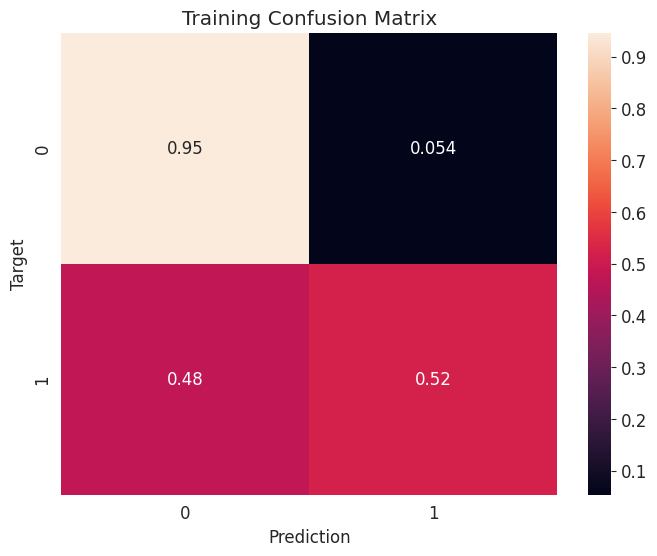

In [ ]:
train_preds = predict_and_plot(X_train, train_target, 'Training')

Accuracy: 85.40%


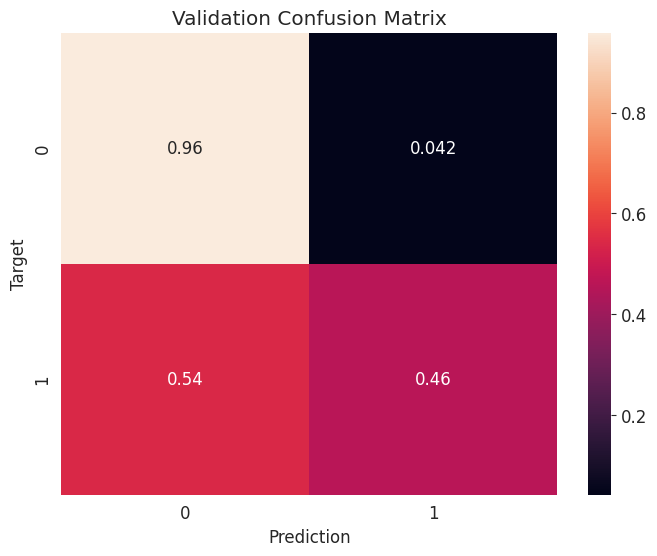

In [ ]:
val_preds = predict_and_plot(X_val, val_target, 'Validation')

Accuracy: 84.20%


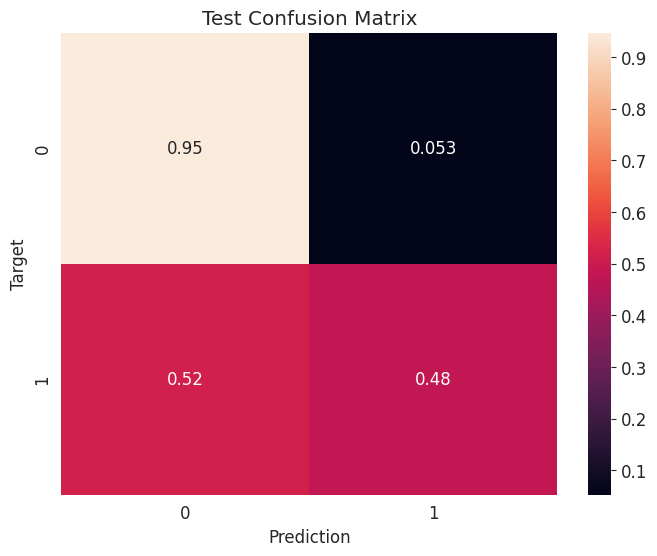

In [ ]:
test_preds = predict_and_plot(X_test, test_target, 'Test')

### **Making Prediction on a Single Input**

In [ ]:
new_input = {'Date': '2025-11-11',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 10.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [ ]:
new_input_df = pd.DataFrame([new_input])

In [ ]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2025-11-11  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0         NNW           10.0         NW  ...         20.0         89.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         58.0       1004.8       1001.5       8.0       5.0     25.7   

   Temp3pm  RainToday  
0     33.0        Yes  

[1 rows x 22 columns]

In [ ]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorial_cols].fillna('N/A'))

/tmp/ipython-input-242846811.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-242846811.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-242846811.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-242846811.py:3: PerformanceWarning:

Da

In [ ]:
X_new_input = new_input_df[numeric_cols + encoded_cols]

In [ ]:
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.031008   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_S  \
0           0.1      0.229885         0.89         0.58  ...           0.0   

   WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0            0.0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  RainToday_Yes  
0             0.0             0.0           0.0            1.0  

[1 rows x 118 columns]

In [ ]:
model.predict(X_new_input)

array(['No'], dtype=object)

In [ ]:
prob = model.predict_proba(X_new_input)[0]
prob

array([0.89344575, 0.10655425])

In [ ]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorial_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [ ]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Albury',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 20.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [ ]:
predict_input(new_input)

/tmp/ipython-input-2708229746.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2708229746.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2708229746.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2708229746.py:5: PerformanceWarning:

('Yes', np.float64(0.7537668162581657))

### **Saving and Loading Trained Model**
We can use `joblib` module to save and load Python from disk.

In [ ]:
import joblib

In [ ]:
exas_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorial_cols': categorial_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(exas_rain, 'exas_rain.joblib')

['exas_rain.joblib']

In [ ]:
aussie_rain = joblib.load('exas_rain.joblib')

In [ ]:
test_preds1 = aussie_rain['model'].predict(X_test)
accuracy_score(test_target, test_preds1)

0.8420070011668611

### **Pull it all Together**

### **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
raw_df = pd.read_csv('/content/weatherAUS.csv')

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace=True)

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df, val_df, test_df = raw_df[year < 2015], raw_df[year == 2015], raw_df[year > 2015]

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
train_inputs, train_target = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_target = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_target = test_df[input_cols].copy(), test_df[target_col].copy()

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorial_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
categorial_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
## Impute the model

imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
## Scaler the model

scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
### OneHotEncoder the model

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorial_cols])
encoded_cols = list(encoder.get_feature_names_out(categorial_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorial_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorial_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorial_cols])

/tmp/ipython-input-2374041363.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2374041363.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2374041363.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2374041363.py:5: PerformanceWarning:

In [300]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')


In [301]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_target = pd.read_parquet('train_target.parquet')[target_col]
val_target = pd.read_parquet('val_target.parquet')[target_col]
test_target = pd.read_parquet('test_target.parquet')[target_col]

### **Model Training and Evaulation**

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [309]:
# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [310]:
## Create and Training Model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_target)

LogisticRegression(solver='liblinear')

In [312]:
## Generate Predictions and Probability
train_preds = model.predict(X_train)
train_prob = model.predict_proba(X_train)
accuracy_score(train_target, train_preds)

0.8519002326815528

In [313]:
def predict_and_plot(inputs, target, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(target, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(target, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 85.41%
Accuracy: 84.25%


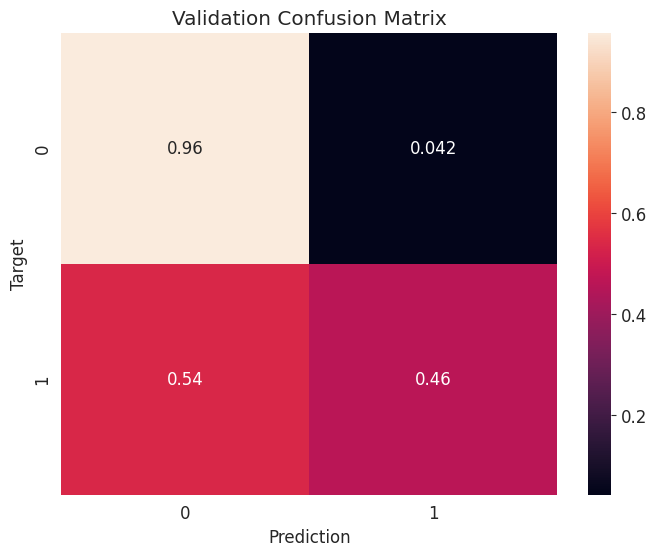

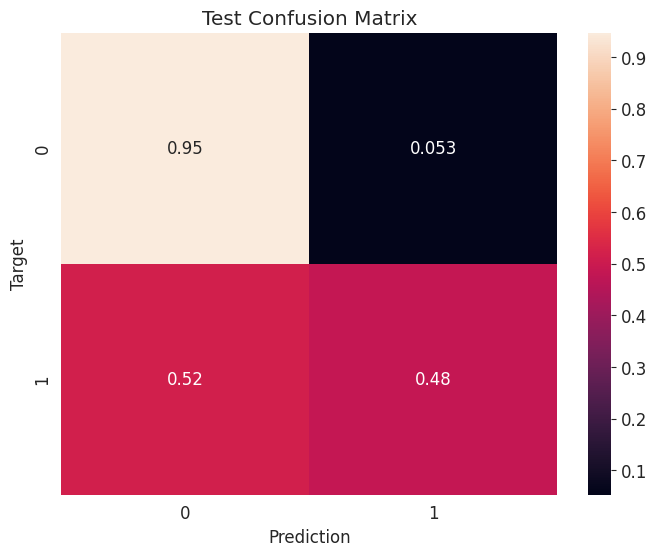

In [314]:
#3 Evaulate the validation and test sets
val_preds = predict_and_plot(X_val, val_target, 'Validation')
test_preds = predict_and_plot(X_test, test_target, 'Test')

In [315]:
## Save the trained model & load it back
exas_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorial_cols': categorial_cols,
    'encoded_cols': encoded_cols
}
joblib.dump(exas_rain, 'exas_rain.joblib')
assian_rain = joblib.load('exas_rain.joblib')

In [322]:
test_preds1 = assian_rain['model'].predict(X_test)
accuracy_score(test_target, test_preds1)

0.8424737456242707

In [324]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [352]:
new_input = {'Date': '2025-11-11',
             'Location': 'Newcastle',
             'MinTemp': 8.2,
             'MaxTemp': 12.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 5.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 20.0,
             'Humidity3pm': 15.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

predict_input(new_input)


/tmp/ipython-input-2708229746.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2708229746.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2708229746.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2708229746.py:5: PerformanceWarning:

('No', np.float64(0.9899860162617264))

In [346]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorial_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [347]:
print(new_input)

{'Date': '2025-11-11', 'Location': 'Newcastle', 'MinTemp': 8.2, 'MaxTemp': 12.2, 'Rainfall': 10.2, 'Evaporation': 4.2, 'Sunshine': nan, 'WindGustDir': 'NNW', 'WindGustSpeed': 52.0, 'WindDir9am': 'NW', 'WindDir3pm': 'NNE', 'WindSpeed9am': 13.0, 'WindSpeed3pm': 20.0, 'Humidity9am': 20.0, 'Humidity3pm': 15.0, 'Pressure9am': 1004.8, 'Pressure3pm': 1001.5, 'Cloud9am': 8.0, 'Cloud3pm': 5.0, 'Temp9am': 25.7, 'Temp3pm': 33.0, 'RainToday': 'Yes'}


In [348]:
new_input_df = pd.DataFrame([new_input])
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2025-11-11  Newcastle      8.2     12.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0         NNW           52.0         NW  ...         20.0         20.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         15.0       1004.8       1001.5       8.0       5.0     25.7   

   Temp3pm  RainToday  
0     33.0        Yes  

[1 rows x 22 columns]

To train a logistic regression model, we can use the LogisticRegression class from Scikit-learn. We covered the following topics in this tutorial:

Downloading a real-world dataset from Kaggle

Exploratory data analysis and visualization

Splitting a dataset into training, validation & test sets

Filling/imputing missing values in numeric columns

Scaling numeric features to a (0,1) range

Encoding categorical columns as one-hot vectors

Training a logistic regression model using Scikit-learn

Evaluating a model using a validation set and test set

Saving a model to disk and loading it back